## Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


## =======================================================================

## 1. Import Necessary Libraries

In [18]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import the Data

In [19]:
data= pd.read_csv('ToyotaCorolla.csv', encoding= 'latin1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [20]:
toyotacars_data= data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyotacars_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## 3. Data Understanding

#### 3.1 Perform the initial Analysis

In [21]:
toyotacars_data.shape

(1436, 9)

In [22]:
toyotacars_data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [23]:
toyotacars_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [24]:
toyotacars_data.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

#### 3.2 Perform the Assumption Checks

##### 1. Linearity Test

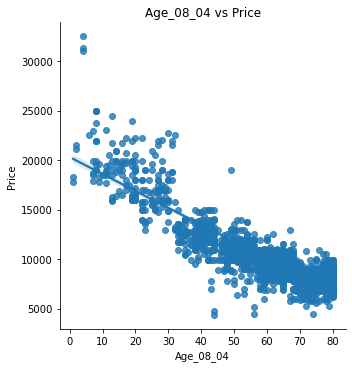

In [32]:
sns.lmplot(x='Age_08_04',y='Price',data=toyotacars_data)
plt.title('Age_08_04 vs Price')
plt.show()

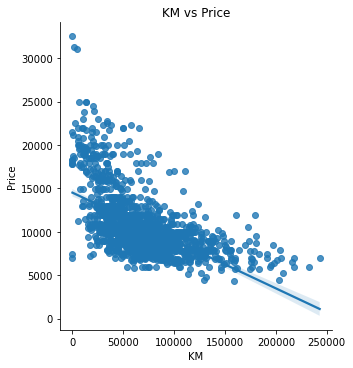

In [33]:
sns.lmplot(x='KM',y='Price',data=toyotacars_data)
plt.title('KM vs Price')
plt.show()

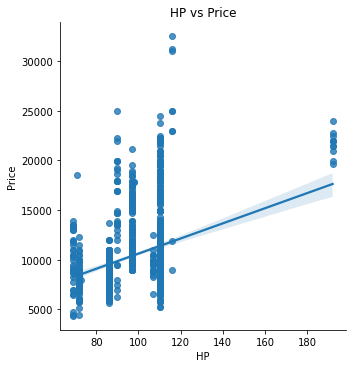

In [34]:
sns.lmplot(x='HP',y='Price',data=toyotacars_data)
plt.title('HP vs Price')
plt.show()

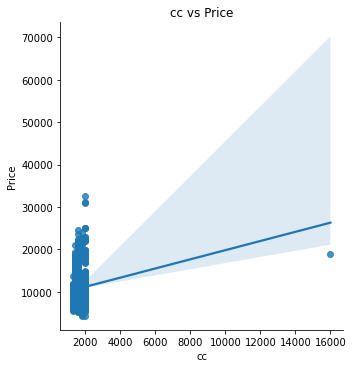

In [35]:
sns.lmplot(x='cc',y='Price',data=toyotacars_data)
plt.title('cc vs Price')
plt.show()

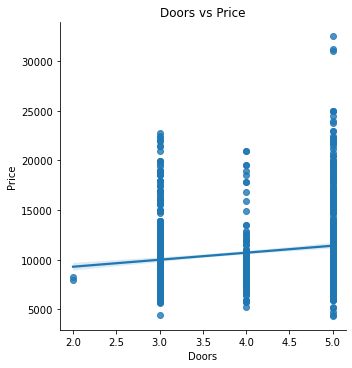

In [36]:
sns.lmplot(x='Doors',y='Price',data=toyotacars_data)
plt.title('Doors vs Price')
plt.show()

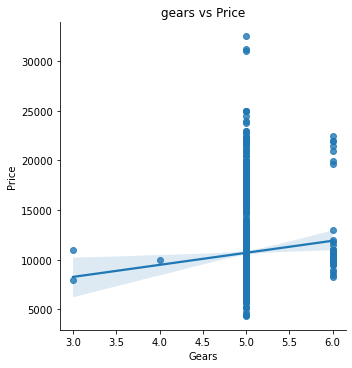

In [38]:
sns.lmplot(x='Gears',y='Price',data=toyotacars_data)
plt.title('gears vs Price')
plt.show()

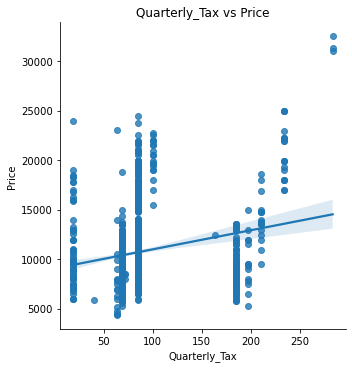

In [39]:
sns.lmplot(x='Quarterly_Tax',y='Price',data=toyotacars_data)
plt.title('Quarterly_Tax vs Price')
plt.show()

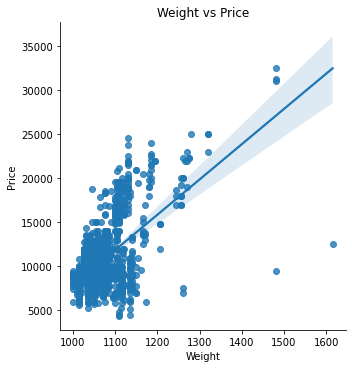

In [40]:
sns.lmplot(x='Weight',y='Price',data=toyotacars_data)
plt.title('Weight vs Price')
plt.show()

##### 2. Normality Test

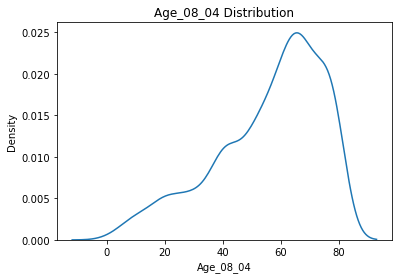

In [41]:
sns.kdeplot(x='Age_08_04',data=toyotacars_data)
plt.title('Age_08_04 Distribution')
plt.show()

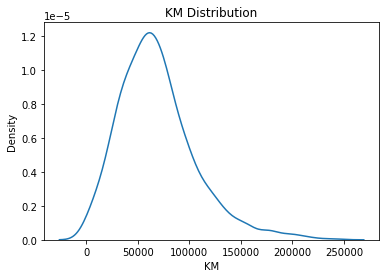

In [43]:
sns.kdeplot(x='KM', data=toyotacars_data)
plt.title('KM Distribution')
plt.show()

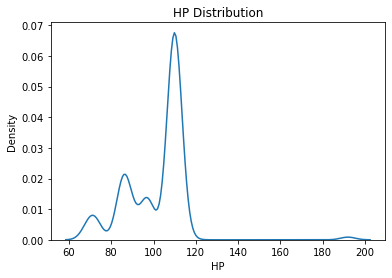

In [44]:
sns.kdeplot(x='HP', data=toyotacars_data)
plt.title('HP Distribution')
plt.show()

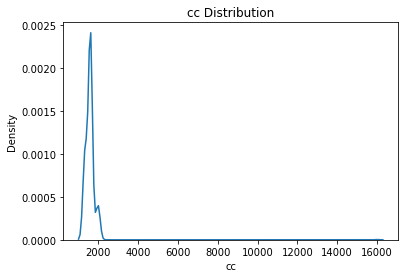

In [45]:
sns.kdeplot(x='cc', data=toyotacars_data)
plt.title('cc Distribution')
plt.show()

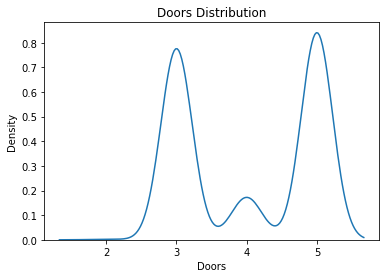

In [46]:
sns.kdeplot(x='Doors', data=toyotacars_data)
plt.title('Doors Distribution')
plt.show()

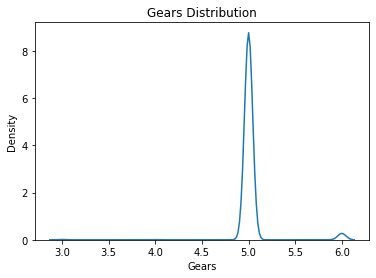

In [47]:
sns.kdeplot(x='Gears', data=toyotacars_data)
plt.title('Gears Distribution')
plt.show()

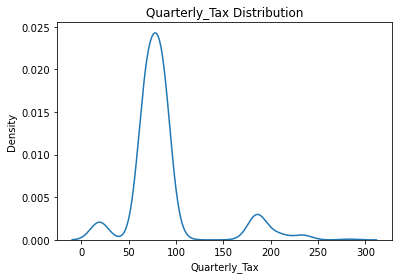

In [50]:
sns.kdeplot(x='Quarterly_Tax', data=toyotacars_data)
plt.title('Quarterly_Tax Distribution')
plt.show()

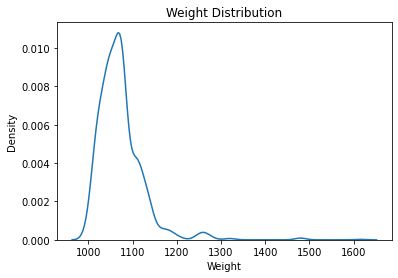

In [51]:
sns.kdeplot(x='Weight', data=toyotacars_data)
plt.title('Weight Distribution')
plt.show()

##### 3. No Multicollinearity

In [52]:
corr_matrix= toyotacars_data.corr().round(2)
corr_matrix

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.00,-0.88,-0.57,0.31,0.13,0.19,0.06,0.22,0.58
Age_08_04,-0.88,1.00,0.51,-0.16,-0.10,-0.15,-0.01,-0.20,-0.47
KM,-0.57,0.51,1.00,-0.33,0.10,-0.04,0.02,0.28,-0.03
HP,0.31,-0.16,-0.33,1.00,0.04,0.09,0.21,-0.30,0.09
cc,0.13,-0.10,0.10,0.04,1.00,0.08,0.01,0.31,0.34
Doors,0.19,-0.15,-0.04,0.09,0.08,1.00,-0.16,0.11,0.30
Gears,0.06,-0.01,0.02,0.21,0.01,-0.16,1.00,-0.01,0.02
Quarterly_Tax,0.22,-0.20,0.28,-0.30,0.31,0.11,-0.01,1.00,0.63
Weight,0.58,-0.47,-0.03,0.09,0.34,0.30,0.02,0.63,1.00


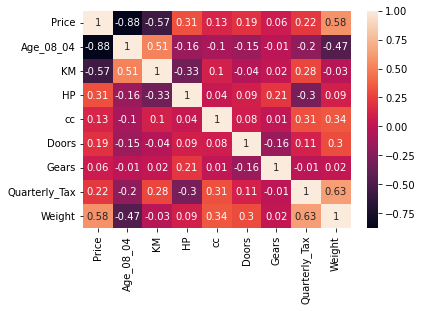

In [59]:
sns.heatmap(data=corr_matrix, annot= True)
plt.show()

In [63]:
# VIF Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
x= startups_data[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [65]:
vif_data= pd.DataFrame()
vif_data['feature']= x.columns

In [66]:
# calculating VIF for each feature

vif_data["VIF"] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]

In [67]:
print(vif_data)

         feature         VIF
0      Age_08_04   16.392684
1             KM    7.590522
2             HP   64.894960
3             cc   17.199750
4          Doors   21.874692
5          Gears  438.631804
6  Quarterly_Tax   11.020074
7         Weight  543.133076


##### 4. No Autoregression

No inputs are showing timedate format so test is passed

##### 5. Homoscedasticity Test || 6. Zero Residual Mean Test

shall be performed after model building

## 4. Model Building

### Model-1

In [68]:
x= toyotacars_data[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
y= toyotacars_data[['Price']]

In [69]:
x.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [70]:
y.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


## 5. Model Training

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
linear_reg_model= LinearRegression()

In [73]:
linear_reg_model.fit(x,y)

LinearRegression()

In [74]:
linear_reg_model.coef_

array([[-1.21658402e+02, -2.08171292e-02,  3.16809058e+01,
        -1.21100301e-01, -1.61664095e+00,  5.94319936e+02,
         3.94908076e+00,  1.69586318e+01]])

In [75]:
linear_reg_model.intercept_

array([-5573.10635791])

## 6. Model Testing

In [76]:
y.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


In [77]:
y_predict= linear_reg_model.predict(x)
y_predict

array([[16812.58050518],
       [16272.35518581],
       [16800.73245987],
       ...,
       [ 8454.29800682],
       [ 8578.03812148],
       [10402.43833285]])

## 7. Model Evaluation 

In [78]:
error= y-y_predict
error

,Price
0,-3312.580505
1,-2522.355186
2,-2850.732460
3,-1476.496731
4,-2472.419010
...,...
1431,-1293.758297
1432,2553.661579
1433,45.701993
1434,-1328.038121


### 5.  Homoscedasticity Test

In [79]:
# x i.e. inputs and y i.e. error are in same size/units, therefore standardization is required on input data (x) 

In [81]:
from sklearn.preprocessing import StandardScaler
standard_x= StandardScaler()
standard_x= standard_x.fit_transform(x)
standard_x= pd.DataFrame(standard_x, columns=["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])
standard_x.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
1,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
2,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
3,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
4,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.853577


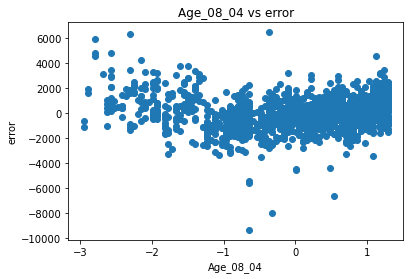

In [82]:
plt.scatter(x= standard_x['Age_08_04'], y=error)
plt.xlabel('Age_08_04')
plt.ylabel('error')
plt.title('Age_08_04 vs error')
plt.show()

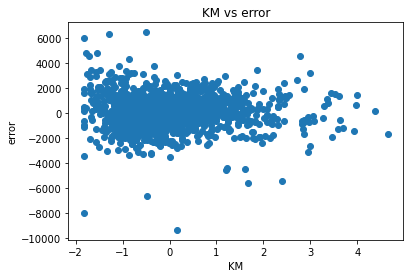

In [83]:
plt.scatter(x= standard_x['KM'], y=error)
plt.xlabel('KM')
plt.ylabel('error')
plt.title('KM vs error')
plt.show()

#### 6. Zero Residual plo

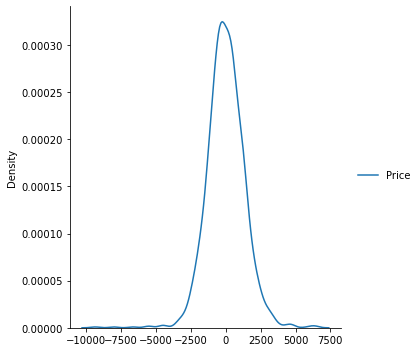

In [84]:
# Another technique
sns.displot(error, kind="kde")# Should be normally distributed.

Zero residual mean test is passed.

In [98]:
# We will check the r2 Score and Adj. R2 Score

In [99]:
from sklearn.metrics import r2_score

In [100]:
r2_score(y, y_predict)
r2= r2_score(y, y_predict)
r2

0.8637627463428191

In [101]:
x.shape

(1436, 8)

In [102]:
#Adjusted R2 Score

1-((1-r2)*(1436-1)/(1436-8-1))

0.8629989775766962

# Even though by check R2 and Adj R2 score that should as close to 1, the model prediction is good. However, we will build few models.

In [103]:
# By Applying the Square root transformation on X &Y 

## Model -2 

In [104]:
toyotacars_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## 4. Model Building

In [171]:
x_rev1= np.sqrt(toyotacars_data.drop(labels=['Price'], axis=1)) # sqrt for x
y_rev1= np.sqrt(toyotacars_data[['Price']])

In [172]:
x_rev1.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,4.795832,216.762543,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
1,4.795832,270.068510,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
2,4.898979,204.232710,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
3,5.099020,219.089023,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
4,5.477226,196.214169,9.486833,44.72136,1.732051,2.236068,14.491377,34.205263


## 5. Model Training

In [173]:
linear_reg_model_2= LinearRegression()

In [174]:
linear_reg_model_2.fit(x_rev1,y_rev1)

LinearRegression()

In [175]:
linear_reg_model_2.coef_

array([[-7.34190137, -0.04364424,  3.28079178, -0.13954257,  0.97235049,
        16.02852197,  0.64408658,  3.10874439]])

In [176]:
linear_reg_model_2.intercept_

array([-5.79007859])

## 6. Model Testing

In [177]:
y_rev1.head()

,Price
0,116.189500
1,117.260394
2,118.110118
3,122.270193
4,117.260394


In [178]:
y_predict_rev1= linear_reg_model_2.predict(x_rev1)
y_predict_rev1

array([[127.38944359],
       [125.06294537],
       [127.17899639],
       ...,
       [ 93.96320258],
       [ 94.41716277],
       [103.57064942]])

## 7. Model Evaluation 

In [179]:
error_2= y_rev1-y_predict_rev1
error_2

,Price
0,-11.199943
1,-7.802551
2,-9.068878
3,-2.791737
4,-6.250595
...,...
1431,-8.162487
1432,10.933019
1433,-1.767758
1434,-9.270231


In [180]:
# Checking R2 square and adj. R2 Score for Model2

In [181]:
r2_2M= r2_score(y_rev1,y_predict_rev1)
r2_2M

0.8654403950553531

In [182]:
x_rev1.shape

(1436, 8)

In [183]:
#Adjusted R2 Score

1-((1-r2_2M)*(50-1)/(81-3-1))

0.9143711604897702

## Model-3

In [124]:
toyotacars_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## 4. Model Building

In [141]:
x_rev2= (toyotacars_data.drop(labels=['Price'], axis=1))
y_rev2= np.sqrt(toyotacars_data[['Price']]) # sqrt for Y

In [142]:
x_rev2.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [143]:
y_rev2.head()

,Price
0,116.189500
1,117.260394
2,118.110118
3,122.270193
4,117.260394


## 5. Model Training

In [144]:
linear_reg_model_3= LinearRegression()

In [145]:
linear_reg_model_3.fit(x_rev2,y_rev2)

LinearRegression()

In [146]:
linear_reg_model_3.coef_

array([[-5.57363156e-01, -1.00662600e-04,  1.40309107e-01,
        -3.48132408e-04,  2.93843782e-01,  3.19562133e+00,
         2.46915684e-02,  5.60376952e-02]])

In [147]:
linear_reg_model_3.intercept_

array([47.22328808])

## 6. Model Testing

In [148]:
y_rev2.head()

,Price
0,116.189500
1,117.260394
2,118.110118
3,122.270193
4,117.260394


In [149]:
y_predict_rev2= linear_reg_model_3.predict(x_rev2)
y_predict_rev2

array([[128.93453959],
       [126.32224445],
       [128.90817166],
       ...,
       [ 92.99325711],
       [ 93.56068652],
       [100.08303529]])

## 7. Model Evaluation 

In [150]:
error_3= y_rev2-y_predict_rev2
error_3

,Price
0,-12.745039
1,-9.061850
2,-10.798054
3,-4.890186
4,-8.907015
...,...
1431,-7.710682
1432,11.903150
1433,-0.797813
1434,-8.413755


In [151]:
# Checking R2 square and adj. R2 Score for Model3

In [152]:
r2_3M= r2_score(y_rev2,y_predict_rev2)
r2_3M

0.8664911454229616

In [153]:
x_rev2.shape

(1436, 8)

In [154]:
#Adjusted R2 Score

1-((1-r2_3M)*(50-1)/(81-3-1))

0.9150398198146119

## Model-4

In [155]:
toyotacars_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## 4. Model Building

In [156]:
x_rev3= np.sqrt(toyotacars_data.drop(labels=['Price'], axis=1))
y_rev3= (toyotacars_data[['Price']])

In [157]:
x_rev3.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,4.795832,216.762543,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
1,4.795832,270.068510,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
2,4.898979,204.232710,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
3,5.099020,219.089023,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
4,5.477226,196.214169,9.486833,44.72136,1.732051,2.236068,14.491377,34.205263


In [158]:
y_rev3.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


## 5. Model Training

In [159]:
linear_reg_model_4= LinearRegression()

In [160]:
linear_reg_model_4.fit(x_rev3,y_rev3)

LinearRegression()

In [161]:
linear_reg_model_4.coef_

array([[-1624.76591856,    -9.14891379,   723.58744816,   -41.80307817,
          -41.30694262,  3156.75403738,   117.58931149,   978.79823087]])

In [162]:
linear_reg_model_4.intercept_

array([-20775.386586])

## 6. Model Testing

In [163]:
y_rev3.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


In [164]:
y_predict_rev3= linear_reg_model_4.predict(x_rev3)
y_predict_rev3

array([[16544.06817585],
       [16056.37647976],
       [16491.11123942],
       ...,
       [ 8691.23851059],
       [ 8791.5044872 ],
       [11115.91582382]])

## 7. Model Evaluation 

In [165]:
error_4= y_rev3-y_predict_rev3
error_4

,Price
0,-3044.068176
1,-2306.376480
2,-2541.111239
3,-1080.173896
4,-1946.572811
...,...
1431,-1420.780913
1432,2317.493601
1433,-191.238511
1434,-1541.504487


In [166]:
# Checking R2 square and adj. R2 Score for Model2

In [167]:
r2_4M= r2_score(y_rev3,y_predict_rev3)
r2_4M

0.8767321795749019

In [168]:
x_rev1.shape

(1436, 8)

In [169]:
#Adjusted R2 Score

1-((1-r2_4M)*(50-1)/(81-3-1))

0.9215568415476648

In [184]:
print('Model_1:', "R2_Score: 0.863" , "Adj_R2_Score: 0.862")
print('Model_2:', "R2_Score: 0.865" , "Adj_R2_Score: 0.914")
print('Model_3:', "R2_Score: 0.866" , "Adj_R2_Score: 0.915")
print('Model_4:', "R2_Score: 0.876" , "Adj_R2_Score: 0.921")

Model_1: R2_Score: 0.863 Adj_R2_Score: 0.862
Model_2: R2_Score: 0.865 Adj_R2_Score: 0.914
Model_3: R2_Score: 0.866 Adj_R2_Score: 0.915
Model_4: R2_Score: 0.876 Adj_R2_Score: 0.921


#### Even after applying the optimizing technique the Performance of Model 1 is better compared to other models, therefore for prediction we will use model-4

## 8. New Data Prediction

In [204]:
X_test= pd.DataFrame(data={'Age_08_04':[23,23,24], 
                           'KM':[46986,72937,41711], 
                           'HP':[90,90,90],
                           'cc':[2000,2000,2000], 
                           'Doors':[3,3,3],
                           'Gears':[5,5,5],
                           'Quarterly_Tax':[210,210,210], 
                           'Weight':[1165,1165,1165]})

X_test

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165


In [211]:
linear_reg_model.predict(X_test)

array([[16812.58050518],
       [16272.35518581],
       [16800.73245987]])

## 9. Model Deployement

In [198]:
from pickle import dump

In [199]:
dump(linear_reg_model,open('Corollaprice_intelligence.pkl','wb'))

In [200]:
from pickle import load

In [201]:
loaded_linear_model = load(open('Corollaprice_intelligence.pkl','rb'))

In [202]:
y_pred = loaded_linear_model.predict(X_test)
y_pred

array([[16812.58050518],
       [16272.35518581],
       [16800.73245987]])

# THE END!!!

## ======================================================================================================================